<h1><center>
$\text{Optimizing a Physics-Informed Neural Network (PINN) to solve the Reynolds Equation.}$
</center><h1>
<h2><center>
This code is part of the article "Optimizing a Physics-Informed Neural Network (PINN) to Solve the Reynolds Equation.", Sánchez López, Z., & Díaz Cortés, G. B. (2024). Wrtitten in python from the Matlab version presented in "Fundamentals of physics-informed neural networks applied to solve the Reynolds boundary value problem", Alqmist, A.
</center><h2>


<font size="2">
<b>NOTE</b>: If you use this code in a scientific publication, please cite the following articles:</font>

<font size="2">Almqvist, A. (2021). Fundamentals of physics-informed neural networks applied to solve the Reynolds boundary value problem. Lubricants, 9(8), 82. </font>

<font size="2">Sánchez López, Z., & Díaz Cortés, G. B. (2024). Optimizing a Physics-Informed Neural Network (PINN) to solve the Reynolds Equation. Revista Mexicana de Física, Sociedad Mexicana de Física A.C., Departamento de Física, Universidad Nacional Autónoma de México.</font>




#Methodology of Physics-Informed Neural Networks for Solving PDEs:


The methodology to approximate a PDE with physics-informed neural networks (PINNs) is based on the minimization of the cost function, taking into account the residual form of the PDE, together with the boundary conditions, and initial conditions. The residual form of the PDE is given in Equation (1),

\begin{align}
\mathcal{R}(t,\boldsymbol{x}) =\frac{\partial \boldsymbol{u}(\boldsymbol{x},t)}{\partial t} + \mathcal{N}[\boldsymbol{u}(\boldsymbol{x},t)] = 0, \quad\quad
\boldsymbol{x} \in \boldsymbol{\Omega}, \, t \in [0,T], \tag{1}
\end{align}

subject to the initial (Equation 2) and boundary conditions (Equation 3):

\begin{align}
&\boldsymbol{u}(t=0,\boldsymbol{x}) = \textit{g}(\boldsymbol{x}),&  \boldsymbol{x}\in \boldsymbol{\Omega} \tag{2}\\  
&\mathcal{B}[\boldsymbol{u}(\boldsymbol{x},t)] = 0,  &\boldsymbol{x}\in \boldsymbol\partial{\Omega},\  t \in [0,T]. \tag{3}
\end{align}

In Equation (1), $\mathcal{N}\left[ \cdot \right]$ represents a differential operator (linear or nonlinear), and $\mathcal{B}\left[ \cdot \right]$ is an operator representing the boundary conditions (Dirichlet, Neumann, Robin, or periodic). The vector $\boldsymbol{x}=(\boldsymbol{x_1},\ldots,\boldsymbol{x_d} )\in \boldsymbol{\Omega} $ is the spatial coordinate, that in general could be in $\mathbb{R}^d$, and $t \in[0,T]$ is the temporal coordinate. The spatial domain and the boundary of the domain where the PDE is defined are represented by $\boldsymbol{\Omega},\boldsymbol{\partial\Omega}\in \mathbb{R}^d$, respectively [1],[2],[3].


#PINNs applied to solving the Reynolds Equation:


$\text{Classical one-dimensional steady-state Reynolds equation in the interval}$ $\Omega=[0,1]$.


\begin{align}
\frac{d}{dx} \left( c(x) \frac{dy}{dx} \right)  &= c^{'}(x)y^{'}+ c(x)y^{''} = f(x);\quad 0<x<1,   \tag{4}
\end{align}

where:
\begin{align}
&c(x) = H^{3};\quad H(x) = 1+K-Kx, \tag{4a}  \\
&c^{'}(x) = -3K(1+K-Kx)^{2}, \tag{4b}  \\
&f(x) = \frac{dH}{dx}=-K, \tag{4c}  \\
\end{align}

$\text{with the following boundary conditions: }$ \\
\begin{align}
y(0)=0,\quad y(1)=0 . \tag{6}
\end{align}

$\text{the Reynolds Equation has an analytical solution given by:}$ \\

\begin{equation}
 y_{ex}(x)=\frac{1}{K}\left( \frac{1}{1+K-Kx} - \frac{1+K}{2+K}\frac{1}{(1+K-Kx)^{2}} - \frac{1}{2+K} \right). \tag{7}
\end{equation}

$\text{If we define the operators \( M \) and \( N \) as:}$ \\

\begin{align}
My &= c'(x)y' + c(x)y'', \tag{8} \\
&Ny = \begin{bmatrix} y(0) \\ y(1) \end{bmatrix} =\begin{bmatrix} 0 \\0\end{bmatrix}. \tag{9}
\end{align}

can be rewritten in terms of the operators \( M \) and \( N \) for a given point $x$ in the domain $x\in [0,1]$, as follows:

\begin{align}
My - f &= 0, & 0 < x < 1, \\
Ny - \textbf{b} &= 0,
\end{align}

where $\textbf{b} = \textbf{0}$.

In the PINNs approach, we approximate the solution with the neural network, that is:
\begin{align}
y(x) \approx {y}_{\theta}(x;\boldsymbol{\theta}). \tag{10}
\end{align}




**Nomenclature:**


- The superscript $j$ indicates the layer number.
- The subscript $i$ refers to the neuron number. For example, $w_i^{(0)}$ represents the weight associated with neuron $i$ in the first layer (0).
- Vectors (lowercase letters in boldface), such as $\boldsymbol{x}$, represent a vector with components $\boldsymbol{x}=[x_1, \ldots, x_n, \ldots, x_N]  \in \mathbb{R}^N$, where $x_n \in \mathbb{R}$ for $n = 1, \ldots, N$.
- $\mathbb{R}^N$ represents the $N$-dimensional space.  

#The elements of the network:

To predict the output $\boldsymbol{u}_\theta(t,\boldsymbol{x}) = y(x)$ of the PINN, the solution domain [0,1] is divided into $N$ points, as illustrated in Figure~\ref{Fig:15}, creating $N-1$ equal subintervals of length $h$ (uniformly spaced mesh points). A value $x_n$  is randomly selected from the vector $ \boldsymbol{x} = [x_1, \ldots, x_n \ldots, x_N]$, where $ x_n \in [0,1]$ and $n = 1..N$. This value is used to train the network.

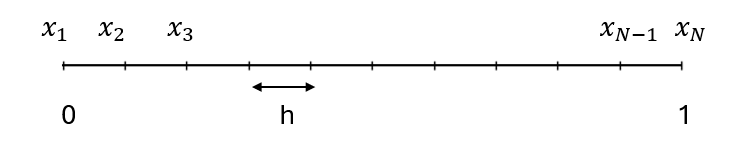

Figure. Domain divided into $N$ points.


The network consists of an input layer where a random element $x_n$ from the vector $\boldsymbol{x}=[x_1, \ldots, x_n \ldots, x_N]  \in \mathbb{R}^N$ is taken as the input value.  This value is then multiplied by all the weights of the first layer, where each ${w}_{i= 1,...,N_n}^{(0)} \in \mathbb{R}, $ is an element of the weights vector  $\boldsymbol{w}^{(0)} =[w^{(0)}_1,  \ldots, w^{(0)}_i, \ldots w^{(0)}_{N_{n}}] \in \mathbb{R}^{N_{n}}$  where ${N_{n}}$ is the number of neurons, thereafter, the corresponding bias ${b}_{i= 1,...,N_n}^{(0)} \in \mathbb{R}$, is added,$ {b}_{i}$ is an element of the bias vector $\boldsymbol{b}^{(0)} =[b^{(0)}_1, b^{(0)}_2, \ldots, b^{(0)}_{N_{n}}] \in \mathbb{R}^{N_{n}}$.

The result of these operations is then passed through the sigmoid activation function $\varphi$, which gives us the output data for each neuron in layer (0):
${z}_i^{(0)}(x_n) = \varphi(w^{(0)}_i x_n + b^{(0)}_i) \in \mathbb{R}, i = 1,...,N_n$, which are elements of the vector
$\boldsymbol{z}^{(0)}(x_n) = [{z_1}^{(0)}(x_n),...,{z_i}^{(0)}(x_n),...,z_{N_{n}}^{(0)}] \in \mathbb{R}^{N_{n}}$ (see Figure \ref{Fig:16}  on the left).

Subsequently, this result is multiplied by the second set of weights, where each ${w}_{i= 1,...,N_n}^{(1)} \in \mathbb{R}$ is an element of the weights vector  $\boldsymbol{w}^{(1)}=[w^{(1)}_1,  \ldots, w^{(1)}_i, \ldots w^{(1)}_{N_{n}}] \in \mathbb{R}^{N_{n}}$.
The dot product between the vectors $\boldsymbol{w}^{(1)}$ and $\boldsymbol{z}^{(0)}$
results in a sum, performed from $i=1$ to $N_{n}$, of the products of their corresponding components.
A second bias term, ${b}^{(1)} \in \mathbb{R}$, is finallyadded, yielding the network output $y(x_n)$ for the point $x_n$ (see Figure \ref{Fig:16}  on the right). The output is then obtained as follows:

$$y({x_n}) = \sum_{i=1}^{N_{n}}{w}_i^{(1)}\varphi({w}_i^{(0)} x_n +{b}_i^{(0)})+b^{(1)} \in \mathbb{R}.$$



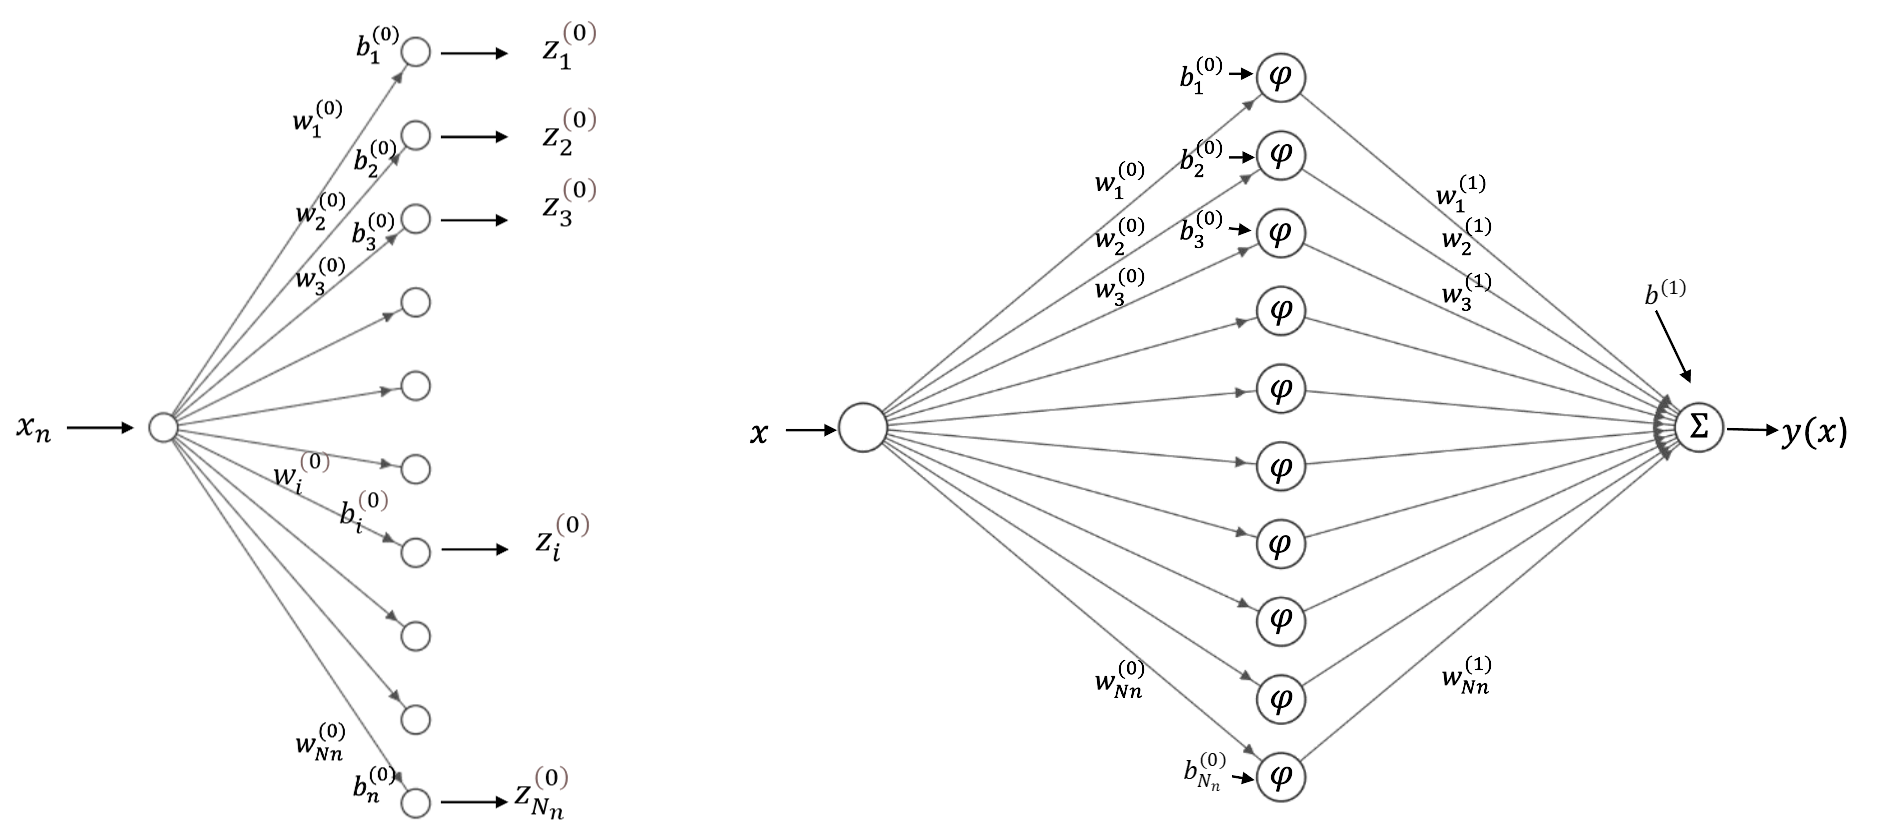



Figure. Output data for each neuron in layer (0), $\boldsymbol{z}^{(0)}(x_n)$ (left). Output of the neural network, $y(x_n)$ (right).



Below, we list the elements of the network:

- **Input data set**:
  $$
  \boldsymbol{x} = [x_1, \ldots, x_n \ldots, x_N] \in \mathbb{R}^N,
  $$
  where $N$ is the number of points into which the [0,1] domain was divided.
  
- **Vector of real-valued weights for layer (0)**:
  $$
  \boldsymbol{w}^{(0)} = [w^{(0)}_1, \ldots, w^{(0)}_i, \ldots, w^{(0)}_{N_{n}}] \in \mathbb{R}^{N_{n}},
  $$
  where $N_{n}$ is the number of neurons.

- **Vector of real-valued biases for layer (0)**:
  $$
  \boldsymbol{b}^{(0)} = [b^{(0)}_1, \ldots, b^{(0)}_i, \ldots, b^{(0)}_{N_{n}}] \in \mathbb{R}^{N_{n}}.
  $$

- **Sigmoid activation function**:
  $$
  \varphi(\varepsilon) = \frac{1}{1 + e^{-\varepsilon}}, \quad \varphi: \mathbb{R} \rightarrow [0, 1].
  $$

- **Output data for each neuron in layer (0)**:
  $$
  {z_i}^{(0)}(x_n) =  \varphi({w_i}^{(0)} x_n + {b_i}^{(0)}) \in \mathbb{R}.
  $$
  
- The vector output containing all the neurons is:
  $$
  \boldsymbol{z}^{(0)}(x_n) = [{z_1}^{(0)},...,{z_i}^{(0)},...,z_{N_{n}}^{(0)}] \in \mathbb{R}^{N_{n}}.
  $$

- **Second weights vector**:
  $$
  \boldsymbol{w}^{(1)}_i = [w^{(1)}_1, \ldots, w^{(1)}_i, \ldots, w^{(1)}_{N_{n}}] \in \mathbb{R}^{N_{n}}.
  $$

- **Second bias term**:
  $$
  b^{(1)}_i = b^{(1)} \in \mathbb{R}.
  $$

- **Output data for a single value $x_n$**:
  $$
  y({x_n}) = \sum_{i=1}^{N_n}{w}_i^{(1)}\varphi({w}_i^{(0)} x_n +{b}_i^{(0)})+b^{(1)} \in \mathbb{R}.
  $$


#Activation Function:
We use as activation function the sigmoid function, defined as:
\begin{equation}
\label{}
\varphi(\varepsilon) = \frac{1}{1 + e^{-\varepsilon}}, \quad \mathbb{R} \rightarrow [0, 1]. \tag{11}
\end{equation}

For future calculations, we need its first, second, and third derivatives. Therefore, we compute them as follows:

1st Derivative of the Activation Function:
$
\varphi'(\varepsilon) = \varphi(\varepsilon)(1 - \varphi(\varepsilon)) \tag{12}
$

2nd Derivative of the Activation Function:
$
\varphi''(\varepsilon) = \varphi(\varepsilon)(1 - \varphi(\varepsilon))(1 - 2\varphi(\varepsilon)) \tag{13}
$

3rd Derivative of the Activation Function:
$
\varphi'''(\varepsilon) = \varphi(\varepsilon)(1 - \varphi(\varepsilon))^2(1 - 3\varphi(\varepsilon)) \tag{14}
$

```
# ******************************************************************************
# ************************** Activation Function *******************************
# ******************************************************************************
# Sigmoid Activation Function (Equation (11)):
def sigmoid(x):
    y = (1/(1+np.exp(-x)))
    return y
# First derivative of the activation function (Equation (12)):
def dsigmoid(x):
    y = np.multiply((sigmoid(x)),(1-(sigmoid(x))))
    return y
# Second derivative of the activation function (Equation (13)):
def ddsigmoid(x):
    y = np.multiply(dsigmoid(x),(1-2*(sigmoid(x))))
    return y
# Third derivative of the activation function (Equation (14)):
def dddsigmoid(x):
    y = np.multiply(ddsigmoid(x),(1-2*sigmoid(x)))-2*dsigmoid(x)*dsigmoid(x)
    return y
#******************************************************************************    
```





#Cost Function:

The cost function for the PINN, in terms of operators, in our case includes only the loss associated with the PDE and the loss due to the boundary conditions. It is expressed as:

\begin{align}
&\mathcal{L}(\boldsymbol{\theta}) = \left\langle (My-f)^2 \right\rangle + \left( (Ny-\textbf{b})\cdot \textbf{e}_1 \right)^2 + \left( (Ny-\textbf{b})\cdot \textbf{e}_2 \right)^2 , \tag{15}
\end{align}

Where $\langle Q \rangle$ is the average value of variable $Q$.

The cost function for solving the Reynolds Equation is:

\begin{equation}
\mathcal{L}(\boldsymbol{\theta}) = \left\langle (c'(x)y' + c(x)y'' - f)^2 \right\rangle + (y(0))^2 + (y(1))^2. \tag{16}
\end{equation}

To optimize the PINN, we need to express the cost function $\mathcal{L}(\boldsymbol{\theta})$  in terms of the weights and biases.
Since the network output $y(x)$ depends on these weights and biases, we can express $\mathcal{L}(\boldsymbol{\theta})$ in terms of  $y(x)$ and its derivatives as follows:

\begin{align}
y(x_n) &= b^{(1)} + \sum_{i=1}^{N_n} \boldsymbol{w}_i^{(1)}z_i(x_n)
  = b^{(1)} + \sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}\varphi(\boldsymbol{w}_i^{(0)} x_n + \boldsymbol{b}_i^{(0)}) \tag{17}
\end{align}
\begin{equation}
y(0) = b^{(1)} + \sum_{i=1}^{N_n} \boldsymbol{w}_i^{(1)}\varphi(\boldsymbol{b}_i^{(0)}) \tag{18}
\end{equation}
\begin{align}
y(1) &= b^{(1)} + \sum_{i=1}^{N_n} \boldsymbol{w}_i^{(1)}\varphi(\boldsymbol{w}_i^{(0)} + \boldsymbol{b}_i^{(0)}) \tag{19}
\end{align}
\begin{align}
y'(x_n) &= \frac{dy}{dx} = \sum_{i=1}^{N_n} \boldsymbol{w}_i^{(1)}\boldsymbol{w}_i^{(0)}\varphi'(\boldsymbol{w}_i^{(0)} x_n + \boldsymbol{b}_i^{(0)}) \tag{20}
\end{align}
\begin{align}
y''(x_n) &= \frac{d^2y}{dx^2} = \sum_{i=1}^{N_n} \boldsymbol{w}_i^{(1)}(\boldsymbol{w}_i^{(0)})^2\varphi''(\boldsymbol{w}_i^{(0)} x_n + \boldsymbol{b}_i^{(0)}) \tag{21}
\end{align}


Substituting the equations (18), (19), (20), and (21) into equation (16), we obtain:

\begin{align}
\mathcal{L} &= \left<\left(c'(x_n) \sum_{i=1}^{N_n} \boldsymbol{w}_i^{(1)}\boldsymbol{w}_i^{(0)}\varphi'(\boldsymbol{w}_i^{(0)} x_n + \boldsymbol{b}_i^{(0)}) + c(x_n) \sum_{i=1}^{N_n} \boldsymbol{w}_i^{(1)}(\boldsymbol{w}_i^{(0)})^2\varphi''(\boldsymbol{w}_i^{(0)} x_n + \boldsymbol{b}_i^{(0)}) - f\right)^2\right> \\
&\quad+ \left(b^{(1)} + \sum_{i=1}^{N_n} \boldsymbol{w}_i^{(1)}\varphi(\boldsymbol{b}_i^{(0)})\right)^2 + \left(b^{(1)} + \sum_{i=1}^{N_n} \boldsymbol{w}_i^{(1)}\varphi(\boldsymbol{w}_i^{(0)}+\boldsymbol{b}_i^{(0)})\right)^2,  \tag{22}
\end{align}

where:
\begin{align}
    c(x) &= (1 + K - Kx)^3, \nonumber \\
    c'(x) &= \frac{dc(x)}{dx} = -3K(1 + K - Kx)^2. \nonumber
\end{align}

Once we have the cost function expressed in terms of the neural network parameters, and since we want to minimize this function, the next step is to use an algorithm to optimize it.
The algorithm we use here is Gradient Descent.


```
# ******************************************************************************
# ************************* Functions for Cost Function ************************
# ******************************************************************************

# First derivative of output y with respect to x: dydx (Equation (20)):
def dy_dx(W1,W0,dzi_z):
    y1 =np.multiply(W0,dzi_z)
    y = np.sum(np.multiply(W1,y1),axis=0)
    return y

# Second derivative of the output with respect to x: d2ydx2 (Equation (21)):
def d2y_dx2(x,W0,W1,dzi_zz):
    N=len(x)
    w02 = w0*w0
    w02_M = np.tile(w02,(N,1)).T
    y1 = np.multiply(w02_M,dzi_zz)
    w1_M  = np.tile(w1,(N,1)).T
    y = np.sum(np.multiply(w1_M,y1),axis = 0)
    return y
#*******************************************************************************

```

#Gradient Descent Algorithm:

The gradient descent algorithm iteratively adjusts the parameters $\boldsymbol{\theta}$, where $\boldsymbol{\theta}$ represents the set of all weights and biases across all layers of the network. In our case: $\boldsymbol{\theta} = \{\boldsymbol{w}^{(0)}, \boldsymbol{w}^{(1)},\boldsymbol{b}^{(0)}, {b}^{(1)} \}$ and we want to find the set of parameters $\boldsymbol{\theta}$ that minimize the cost function $\mathcal{L}(\boldsymbol{\theta})$ as defined in Equation 22.

The gradient $\nabla_{\boldsymbol{\theta}} \mathcal{L} (\boldsymbol{\theta}_{n})$ is computed, indicating the direction of the steepest increase in the cost function. The parameters are then adjusted in the opposite direction of the gradient using:

\begin{align}
\boldsymbol{\theta}_{n+1} = \boldsymbol{\theta}_{n} - \eta \nabla_{\boldsymbol{\theta}} \mathcal{L} (\boldsymbol{\theta}_{n}) \nonumber,
\end{align}
where $\eta$ is the learning rate, and the parameters of the neural network are initialized randomly. \\

This process continues until the error is less than a user-defined tolerance value or until a maximum number of iterations is reached. When either of these conditions is met, the obtained weights and biases are those that minimize the cost function within the established tolerance.
The goal is to minimize the cost function value to optimize the model. \\

To illustrate the process of conjugate gradient, see Figure \ref{Fig:17}, where we have an initial parameter ${w_i}^{(0)}$. We compute the gradient of the function in this point $ \frac{\partial \mathcal{L}(\boldsymbol{\theta})}{\partial {w_i}^{(0)}}$. The next position ${w_{i+1}}^{(0)}$ of the parameter is found taking the initial position and giving a step $\eta$ in the opposite direction of the gradient (which is the direction of bigger growth of the function), i.e.:

\begin{equation}
{w}_{i+1}^{(0)} = {w}_{i}^{(0)} - \eta \frac{\partial \mathcal{L}\left(\boldsymbol{\theta}\right)}{\partial {w}_i^{(0)}}. \nonumber
\end{equation}


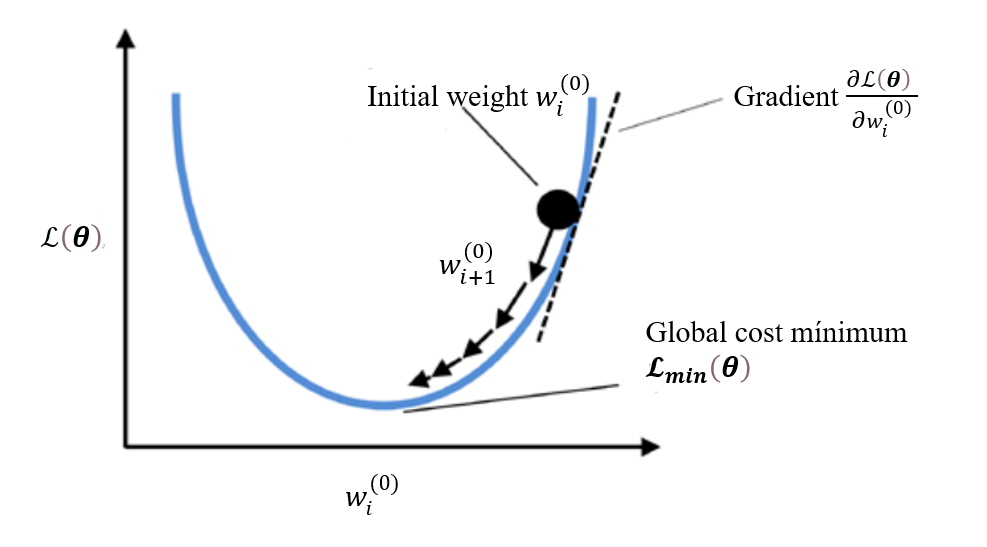

Figure. Gradient Descent Algorithm.



In our case, the cost function depends on the weights and biases of each layer. Therefore, the parameters are adjusted using the following formulas:

\begin{alignat}{2}
{w}_{i+1}^{(0)} &= {w}_{i}^{(0)}-\eta \frac{\partial \mathcal{L}(\boldsymbol{\theta})}{\partial {w}_i^{(0)}}, &\quad {w}_{i+1}^{(1)} &= {w}_{i}^{(1)}-\eta \frac{\partial \mathcal{L}(\boldsymbol{\theta})}{\partial {w}_i^{(1)}}, \nonumber  \\
{b}_{i+1}^{(0)} &= {b}_{i}^{(0)} -\eta \frac{\partial \mathcal{L}(\boldsymbol{\theta})}{\partial {b}_i^{(0)}}, &\quad  
b^{(1)}_{i+1} &= b^{(1)}_{i} -\eta \frac{\partial \mathcal{L}(\theta)}{\partial b^{(1)}_{i}},  \tag{23} \\
\end{alignat}

where the step $\eta$ is an hyperparameter known as the learning rate. \\
The derivatives of the equations 23 are computed analytically by differentiating the equations, which requires the partial derivatives of the general cost function with respect to each weight and bias. These derivatives are presented next:

\begin{align}
    \frac{\partial \mathcal{L}}{\partial {w}_i^{(0)}}
    &= \frac{\partial\langle(My-f)^2\rangle}{\partial {w}_i^{(0)}}
    + \frac{\partial((Ny-\textbf{b}) \cdot \textbf{e}_1 )^2}{\partial {w}_i^{(0)}}
    + \frac{\partial((Ny-\textbf{b}) \cdot \textbf{e}_2 )^2}{\partial {w}_i^{(0)}} \\
    &= \frac{\partial\langle(c'(x)y' + c(x)y'' - f)^2\rangle}{\partial {w}_i^{(0)}}
    + \frac{\partial((y(0)-0))^2}{\partial {w}_i^{(0)}}
    + \frac{\partial((y(1)-0))^2}{\partial {w}_i^{(0)}} \\
    &= \left\langle
        2 \left( c(x) y'' + c'(x) y' - f \right)
        \left(
            c(x) \frac{\partial y''}{\partial w_i^{(0)}}
            + c'(x) \frac{\partial y'}{\partial w_i^{(0)}}
            - \frac{\partial f}{\partial w_i^{(0)}}
        \right)
    \right\rangle \\
    &\quad + 2(y(0) - 0) \frac{\partial y(0)}{\partial w_i^{(0)}}
    + 2(y(1) - 0) \frac{\partial y(1)}{\partial w_i^{(0)}}, \tag{24} \\
\end{align}
\begin{align}
    \frac{\partial \mathcal{L}}{\partial {w}_i^{(1)}}
    &= \frac{\partial\langle(My-f)^2\rangle}{\partial {w}_i^{(1)}}
    + \frac{\partial((Ny-\textbf{b}) \cdot \textbf{e}_1 )^2}{\partial {w}_i^{(1)}}
    + \frac{\partial((Ny-\textbf{b}) \cdot \textbf{e}_2 )^2}{\partial {w}_i^{(1)}} \\
    &= \frac{\partial\langle(c'(x)y' + c(x)y'' - f)^2\rangle}{\partial {w}_i^{(1)}}
    + \frac{\partial((y(0)-0))^2}{\partial {w}_i^{(1)}}
    + \frac{\partial((y(1)-0))^2}{\partial {w}_i^{(1)}} \\
    &= \left\langle
        2 \left( c(x) y'' + c'(x) y' - f \right)
        \left(
            c(x) \frac{\partial y''}{\partial w_i^{(1)}}
            + c'(x) \frac{\partial y'}{\partial w_i^{(1)}}
            - \frac{\partial f}{\partial w_i^{(1)}}
        \right)
    \right\rangle \\
    &\quad + 2(y(0) - 0) \frac{\partial y(0)}{\partial w_i^{(1)}}
    + 2(y(1) - 0) \frac{\partial y(1)}{\partial w_i^{(1)}}, \tag{25} \\
\end{align}
\begin{align}
    \frac{\partial \mathcal{L}}{\partial {b}_i^{(0)}}
    &= \frac{\partial\langle(My-f)^2\rangle}{\partial {b}_i^{(0)}}
    + \frac{\partial((Ny-\textbf{b}) \cdot \textbf{e}_1 )^2}{\partial {b}_i^{(0)}}
    + \frac{\partial((Ny-\textbf{b}) \cdot \textbf{e}_2 )^2}{\partial {b}_i^{(0)}} \\
    &= \frac{\partial\langle(c'(x)y' + c(x)y'' - f)^2\rangle}{\partial {b}_i^{(0)}}
    + \frac{\partial((y(0)-0))^2}{\partial {b}_i^{(0)}}
    + \frac{\partial((y(1)-0))^2}{\partial {b}_i^{(0)}} \\
    &= \left\langle
        2 \left( c(x) y'' + c'(x) y' - f \right)
        \left(
            c(x) \frac{\partial y''}{\partial b_i^{(0)}}
            + c'(x) \frac{\partial y'}{\partial b_i^{(0)}}
            - \frac{\partial f}{\partial b_i^{(0)}}
        \right)
    \right\rangle \\
    &\quad + 2(y(0) - 0) \frac{\partial y(0)}{\partial b_i^{(0)}}
    + 2(y(1) - 0) \frac{\partial y(1)}{\partial b_i^{(0)}}, \tag{26} \\
\end{align}
\begin{align}
    \frac{\partial \mathcal{L}}{\partial b^{(1)}}
    &= \frac{\partial\langle(My-f)^2\rangle}{\partial b^{(1)}}
    + \frac{\partial((Ny-\textbf{b}) \cdot \textbf{e}_1 )^2}{\partial b^{(1)}}
    + \frac{\partial((Ny-\textbf{b}) \cdot \textbf{e}_2 )^2}{\partial b^{(1)}} \\
    &= \frac{\partial\langle(c'(x)y' + c(x)y'' - f)^2\rangle}{\partial b^{(1)}}
    + \frac{\partial((y(0)-0))^2}{\partial b^{(1)}}
    + \frac{\partial((y(1)-0))^2}{\partial b^{(1)}} \\
    &= \left\langle
        2 \left( c(x) y'' + c'(x) y' - f \right)
        \left(
            c(x) \frac{\partial y''}{\partial b^{(1)}}
            + c'(x) \frac{\partial y'}{\partial b^{(1)}}
            - \frac{\partial f}{\partial b^{(1)}}
        \right)
    \right\rangle \\
    &\quad + 2(y(0) - 0) \frac{\partial y(0)}{\partial b^{(1)}}
    + 2(y(1) - 0) \frac{\partial y(1)}{\partial b^{(1)}} \tag{27} \\
\end{align}





The expressions (24), (25), (26), and (27), require a set of derivatives, which we calculate below.

For equation 24, we need:

\begin{align*}
    \frac{\partial y'}{\partial {w}_i^{(0)}}, \quad
    \frac{\partial y''}{\partial {w}_i^{(0)}}, \quad
    \frac{\partial y(0)}{\partial {w}_i^{(0)}}, \quad
    \frac{\partial y(1)}{\partial {w}_i^{(0)}}.
\end{align*}



From equations (17), (18), (19), (20), and (21), we have the values of  $y(x)$, $y(0)$, $y(1)$, $y'$, and $y''$ respectively. Here, we will need the activation function and its respective derivatives, which are given by equations (11), (12), (13), and (14).
Substituting the values of $y'$, $y''$, $y(0)$, and $y(1)$ and differentiating with respect to ${w}_i^{(0)}$, we obtain the following:

\begin{equation}
\frac{\partial y'}{\partial {w}_i^{(0)}} = \sum_{i=1}^{N_n} {w}_i^{(1)}\varphi'({w}_i^{(0)} x_n + {b}_i^{(0)}) + \sum_{i=1}^{N_n} x_n {w}_i^{(1)}({w}_i^{(0)})^{2}\varphi''({w}_i^{(0)} x_n + {b}_i^{(0)}), \tag{28}
\end{equation}
\begin{equation}
\frac{\partial y''}{\partial {w}_i^{(0)}} = \sum_{i=1}^{N_n} 2 {w}_i^{(1)}{w}_i^{(0)}\varphi''({w}_i^{(0)} x_n + {b}_i^{(0)}) + \sum_{i=1}^{N_n} x_n {w}_i^{(1)}({w}_i^{(0)})^{2}\varphi'''({w}_i^{(0)} x_n + {b}_i^{(0)}), \tag{29}
\end{equation}
since
\begin{equation}
\frac{\partial y(x_n)}{\partial {w}_i^{(0)}} = \sum_{i=1}^{N_n} {w}_i^{(1)}\varphi'({w}_i^{(0)} (x_n) + {b}_i^{(0)})x_n, \tag{30}
\end{equation}
then
\begin{equation}
\frac{\partial y(0)}{\partial {w}_i^{(0)}} = 0, \tag{31}
\end{equation}
\begin{equation}
\frac{\partial y(1)}{\partial {w}_i^{(0)}} = \sum_{i=1}^{N_n} {w}_i^{(1)}\varphi'({w}_i^{(0)} (1) + {b}_i^{(0)}) (1) =\sum_{i=1}^{N_n} {w}_i^{(1)}\varphi'({w}_i^{(0)} + {b}_i^{(0)}). \tag{32}
\end{equation}



```
# ******************************************************************************
# ********************** Functions for Gradient Descent ************************
# ******************************************************************************

# dy'/dw0 = dy_x_w0 (Equation (28)):
def dydx_dw0(xi,w0,w1,dzi_z,dzi_zz):
    w02 = w0*w0
    w02dy_xx= np.multiply(w02,dzi_zz)
    w1w02dy_xx = np.multiply(w1,w02dy_xx)
    y =np.multiply(w1,dzi_z) + np.multiply(xi,w1w02dy_xx)
    return y

# dy''/dw0 = dy_xx_w0 (Equation (29)):
def dydxx_dw0(w0,w1,dzi_zz,dzi_zzz,xi):
    w02 = w0*w0
    w02dzi_zzz = np.multiply(w02,dzi_zzz)
    w1w02dzi_zzz = np.multiply(w1,w02dzi_zzz)
    y = 2*np.multiply(w1,np.multiply(w0,dzi_zz)) + xi*w1w02dzi_zzz
    return y

#dy0/dw0 = dy0_dw0  (Equation (31)):
def dy0_dw0(w0):
    one = np.ones(np.shape(w0))
    y = 0*one;
    return y

#dy1/dw0 = dy1_dw0 (Equation (32)):
def dy1_dw0(w1,w0,b0):
  y= np.multiply(w1,np.multiply(sigmoid(w0+b0),(1-sigmoid(w0+b0))))
  return y

 ```

For equation 25, we need:

\begin{align*}
    \frac{\partial y'}{\partial {w}_i^{(1)}}, \quad
    \frac{\partial y''}{\partial {w}_i^{(1)}}, \quad
    \frac{\partial y(0)}{\partial {w}_i^{(1)}}, \quad
    \frac{\partial y(1)}{\partial {w}_i^{(1)}}.
\end{align*}

From equations (17), (18), (19), (20), and (21), we have the values of  $y(x)$, $y(0)$, $y(1)$, $y'$, and $y''$ respectively. Here, we will need the activation function and its respective derivatives, which are given by equations (11), (12), (13), and (14).
Substituting the values of $y'$, $y''$, $y(0)$, and $y(1)$ and differentiating with respect to ${w}_i^{(1)}$, we obtain the following:

\begin{equation}
\frac{\partial y'}{\partial {w}_i^{(1)}} = \sum_{i=1}^{N_n} {w}_i^{(0)}\varphi'({w}_i^{(0)} x_n + {b}_i^{(0)}), \tag{33}
\end{equation}
\begin{equation}
\frac{\partial y''}{\partial {w}_i^{(1)}} = \sum_{i=1}^{N_n} ({w}_i^{(0)})^2\varphi''({w}_i^{(0)} x_n + {b}_i^{(0)}), \tag{34}
\end{equation}
since
\begin{equation}
\frac{\partial y(x)}{\partial {w}_i^{(1)}} = \sum_{i=1}^{N_n} \varphi({w}_i^{(0)} x_n + {b}_i^{(0)}), \tag{35}
\end{equation}
then:
\begin{equation}
\frac{\partial y(0)}{\partial {w}_i^{(1)}} = \sum_{i=1}^{N_n} \varphi({w}_i^{(0)} (0) + {b}_i^{(0)})=\sum_{i=1}^{N_n} \varphi( {b}_i^{(0)}) , \tag{36}
\end{equation}
\begin{equation}
\frac{\partial y(1)}{\partial {w}_i^{(1)}} = \sum_{i=1}^{N_n} \varphi({w}_i^{(0)} (1) + {b}_i^{(0)})= \sum_{i=1}^{N_n} \varphi({w}_i^{(0)} + {b}_i^{(0)}),\tag{37}
\end{equation}



```
# ******************************************************************************
# ********************** Functions for Gradient Descent ************************
# ******************************************************************************


# dy'/w1 = dydx_dw1 (Equation (33)):
def dydx_dw1(w0,w1,dzi_z,dzi_zz):
    y = np.multiply(w0,dzi_z)
    return y

# dy''/dw1 = dydxx_dw1 (Equation (34)):
def dydxx_dw1(w0,dzi_zz):
    y = np.multiply(w0*w0,dzi_zz)
    return y

#dy0/dw1=dy0_dw1 (Equation (36)):
def dy0_dw1(b0):
    y = sigmoid(b0)
    return y

#dy1/dw1 = dy1_dw1  (Equation (37)):
def dy1_dw1(w0,b0):
    y = sigmoid(w0+b0)
    return y

```    

For equation 26, we need:

\begin{align*}
    \frac{\partial y'}{\partial {b}_i^{(0)}}, \quad
    \frac{\partial y''}{\partial {b}_i^{(0)}}, \quad
    \frac{\partial y(0)}{\partial {b}_i^{(0)}}, \quad
    \frac{\partial y(1)}{\partial {b}_i^{(0)}}.
\end{align*}

From equations (17), (18), (19), (20), and (21), we have the values of $y(x)$, $y(0)$, $y(1)$, $y'$, and $y''$ respectively. Here, we will need the activation function and its respective derivatives, which are given by equations (11), (12), (13), and (14).

Substituting the values of $y'$, $y''$, $y(0)$, and $y(1)$ and differentiating with respect to ${b}_i^{(0)}$, we obtain the following:
\begin{equation}
\frac{\partial y'}{\partial {b}_i^{(0)}} = \sum_{i=1}^{N_n} {w}_i^{(1)}{w}_i^{(0)}\varphi''({w}_i^{(0)} x_n + {b}_i^{(0)}), \tag{38}
\end{equation}
\begin{equation}
\frac{\partial y''}{\partial {b}_i^{(0)}} = \sum_{i=1}^{N_n} {w}_i^{(1)}({w}_i^{(0)})^{2}\varphi'''({w}_i^{(0)} x_n + {b}_i^{(0)}), \tag{39}
\end{equation}
since
\begin{equation}
\frac{\partial y(x)}{\partial {b}_i^{(0)}} = \sum_{i=1}^{N_n} {w}_i^{(1)}\varphi'({w}_i^{(0)} x_n + {b}_i^{(0)}), \tag{40}
\end{equation}
then
\begin{equation}
\frac{\partial y(0)}{\partial {b}_i^{(0)}} = \sum_{i=1}^{N_n} {w}_i^{(1)}\varphi'({w}_i^{(0)} (0) + {b}_i^{(0)})=\sum_{i=1}^{N_n} {w}_i^{(1)}\varphi'({b}_i^{(0)}) , \tag{41}
\end{equation}
\begin{equation}
\frac{\partial y(1)}{\partial {b}_i^{(0)}} = \sum_{i=1}^{N_n} {w}_i^{(1)}\varphi'({w}_i^{(0)} (1) + {b}_i^{(0)})= \sum_{i=1}^{N_n} {w}_i^{(1)}\varphi'({w}_i^{(0)} + {b}_i^{(0)}). \tag{42}
\end{equation}



```
# ******************************************************************************
# ********************** Functions for Gradient Descent ************************
# ******************************************************************************

# dy'/db0 = dydx_db0 (Equation (38)):
def dydx_db0(w1,w0,dzi_zz):
    y = np.multiply(w1,np.multiply(w0,dzi_zz))
    return y

#dy''/db0 = dydxx_db0 (Equation (39)):
def dydxx_db0(w0,w1,dzi_zzz):
    w02dzi_zzz = np.multiply(w0*w0,dzi_zzz)
    y = np.multiply(w1,w02dzi_zzz)
    return y

#dy0/db0=dy0_db0 (Equation (41)):
def dy0_db0(w1,b0):
    y = np.multiply(w1,np.multiply(sigmoid(b0),(1-sigmoid(b0))))
    return y

#dy1/db0 = dy1_db0 (Equation (42)):
def dy1_db0(w1,w0,b0):
    y = np.multiply(w1,np.multiply(sigmoid(w0+b0),(1-sigmoid(w0+b0))))
    return y

```

For equation 27, we need:

\begin{align*}
    \frac{\partial y'}{\partial {b}^{(1)}}, \quad
    \frac{\partial y''}{\partial {b}^{(1)}}, \quad
    \frac{\partial y(0)}{\partial {b}^{(1)}}, \quad
    \frac{\partial y(1)}{\partial {b}^{(1)}}.
\end{align*}

From equations (17), (18), (19), (20), and (21), we have the values of $y(x)$, $y(0)$, $y(1)$, $y'$, and $y''$ respectively. Here, we will need the activation function and its respective derivatives, which are given by equations  (11), (12), (13), and (14).

Substituting the values of $y'$, $y''$, $y(0)$, and $y(1)$ and differentiating with respect to ${b}^{(1)}$, we obtain the following:

\begin{equation}
\frac{\partial y'}{\partial b^{(1)}} = 0, \tag{43}
\end{equation}
\begin{equation}
\frac{\partial y''}{\partial b^{(1)}} = 0, \tag{44}
\end{equation}
since
\begin{equation}
\frac{\partial y(x)}{\partial b^{(1)}} = 1, \tag{45}
\end{equation}
then:
\begin{equation}
\frac{\partial y(0)}{\partial b^{(1)}} = 1, \tag{46}
\end{equation}
\begin{equation}
\frac{\partial y(1)}{\partial b^{(1)}} = 1.  \tag{47}
\end{equation}

Once the necessary derivatives for equations 24, 25, 26, and 27  have been computed, we can iteratively update the weights and biases according to equation 23. Then, we calculate the cost function using these updated weights and biases, as indicated in equation 22.
The optimization is performed over $T_b$ batches, and the entire process is repeated across the specified number of epochs.



```
# ******************************************************************************
# ********************** Functions for Gradient Descent ************************
# ******************************************************************************

# dy'/db1 = dydx_db1 (Equation (43)):
def dydx_db1():
    y = 0
    return y
# dy''/db1 = dydxx_db1 (Equation (44)):
def dydxx_db1():
    y = 0
    return y

#dy0/db1 = dy0_db1 (Equation (46)):
def dy0_db1():
     y= 1;
     return y
#dy1/db1 =  dy1_db1 (Equation (47)):
def dy1_db1():
    y = 1;
    return y

```


# Numerical Experiments:
 This code reproduces part of Experiment A, where the neural network is trained to solve the Reynolds equation according to the formulas described earlier. As you will observe, the solution does not always converge, so we decided to repeat the process 100 times until convergence was achieved.

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import random
random.seed(10)

#Experiment A:


In [2]:
# ******************************************************************************
# ************************** Activation Function *******************************
# ******************************************************************************

# Sigmoid Activation Function (Equation (11)):
def sigmoid(x):
    y = (1/(1+np.exp(-x)))
    return y
# First derivative of the activation function (Equation (12)):
def dsigmoid(x):
    y = np.multiply((sigmoid(x)),(1-(sigmoid(x))))
    return y
# Second derivative of the activation function (Equation (13)):
def ddsigmoid(x):
    y = np.multiply(dsigmoid(x),(1-2*(sigmoid(x))))
    return y
# Third derivative of the activation function (Equation (14)):
def dddsigmoid(x):
    y = np.multiply(ddsigmoid(x),(1-2*sigmoid(x)))-2*dsigmoid(x)*dsigmoid(x)
    return y

In [3]:
# ******************************************************************************
# ************************* Functions for Cost Function ************************
# ******************************************************************************

# First derivative of output y with respect to x: dydx (Equation (20)):
def dy_dx(W1,W0,dzi_z):
    y1 =np.multiply(W0,dzi_z)
    y = np.sum(np.multiply(W1,y1),axis=0)
    return y

# Second derivative of the output with respect to x: d2ydx2 (Equation (21)):
def d2y_dx2(x,W0,W1,dzi_zz):
    N=len(x)
    w02 = w0*w0
    w02_M = np.tile(w02,(N,1)).T
    y1 = np.multiply(w02_M,dzi_zz)
    w1_M  = np.tile(w1,(N,1)).T
    y = np.sum(np.multiply(w1_M,y1),axis = 0)
    return y

In [4]:
# ******************************************************************************
# ********************** Functions for Gradient Descent ************************
# ******************************************************************************

# dy'/dw0 = dy_x_w0 (Equation (28)):
def dydx_dw0(xi,w0,w1,dzi_z,dzi_zz):
    w02 = w0*w0
    w02dy_xx= np.multiply(w02,dzi_zz)
    w1w02dy_xx = np.multiply(w1,w02dy_xx)
    y =np.multiply(w1,dzi_z) + np.multiply(xi,w1w02dy_xx)
    return y

# dy''/dw0 = dy_xx_w0 (Equation (29)):
def dydxx_dw0(w0,w1,dzi_zz,dzi_zzz,xi):
    w02 = w0*w0
    w02dzi_zzz = np.multiply(w02,dzi_zzz)
    w1w02dzi_zzz = np.multiply(w1,w02dzi_zzz)
    y = 2*np.multiply(w1,np.multiply(w0,dzi_zz)) + xi*w1w02dzi_zzz
    return y

#dy0/dw0 = dy0_dw0  (Equation (31)):
def dy0_dw0(w0):
    one = np.ones(np.shape(w0))
    y = 0*one;
    return y

#dy1/dw0 = dy1_dw0 (Equation (32)):
def dy1_dw0(w1,w0,b0):
  y= np.multiply(w1,np.multiply(sigmoid(w0+b0),(1-sigmoid(w0+b0))))
  return y

# dy'/w1 = dydx_dw1 (Equation (33)):
def dydx_dw1(w0,w1,dzi_z,dzi_zz):
    y = np.multiply(w0,dzi_z)
    return y

# dy''/dw1 = dydxx_dw1 (Equation (34)):
def dydxx_dw1(w0,dzi_zz):
    y = np.multiply(w0*w0,dzi_zz)
    return y

#dy0/dw1=dy0_dw1 (Equation (36)):
def dy0_dw1(b0):
    y = sigmoid(b0)
    return y

#dy1/dw1 = dy1_dw1  (Equation (37)):
def dy1_dw1(w0,b0):
    y = sigmoid(w0+b0)
    return y

# dy'/db0 = dydx_db0 (Equation (38)):
def dydx_db0(w1,w0,dzi_zz):
    y = np.multiply(w1,np.multiply(w0,dzi_zz))
    return y

#dy''/db0 = dydxx_db0 (Equation (39)):
def dydxx_db0(w0,w1,dzi_zzz):
    w02dzi_zzz = np.multiply(w0*w0,dzi_zzz)
    y = np.multiply(w1,w02dzi_zzz)
    return y

#dy0/db0=dy0_db0 (Equation (41)):
def dy0_db0(w1,b0):
    y = np.multiply(w1,np.multiply(sigmoid(b0),(1-sigmoid(b0))))
    return y

#dy1/db0 = dy1_db0 (Equation (42)):
def dy1_db0(w1,w0,b0):
    y = np.multiply(w1,np.multiply(sigmoid(w0+b0),(1-sigmoid(w0+b0))))
    return y

# dy'/db1 = dydx_db1 (Equation (43)):
def dydx_db1():
    y = 0
    return y
# dy''/db1 = dydxx_db1 (Equation (44)):
def dydxx_db1():
    y = 0
    return y

#dy0/db1 = dy0_db1 (Equation (46)):
def dy0_db1():
     y= 1;
     return y
#dy1/db1 =  dy1_db1 (Equation (47)):
def dy1_db1():
    y = 1;
    return y


In [5]:
# ******************************************************************************
# *************************** Prediction function ******************************
# ******************************************************************************
def prediction(x,w0,b0,w1,b1):
    # Reprocessing for vectorization of the output len(x) number of elements.
    Nn = len(w0);
    N  = len(x);

    W0 = np.tile(w0, (N, 1)).T
    B0 = np.tile(b0, (N, 1)).T
    W1 = np.tile(w1, (N, 1)).T
    X  = np.tile(x, (Nn, 1))

    # The prediction of y(x)
    z =  np.multiply(W0,X)+B0
    z_i   = sigmoid(z)
    dzi_z = dsigmoid(z)
    dzi_zz = ddsigmoid(z)

    # The prediction of y(x) (Equation (17))
    y     = np.sum(np.multiply(W1,z_i),axis=0) + b1

    # The prediction of y(0) (Equation (18))
    y0    = np.sum(np.multiply(w1,sigmoid(b0)),axis =0)+b1;

    # The prediction of y(1) (Equation (19))
    y1    = np.sum(np.multiply(w1,sigmoid(w0+b0)),axis =0)+b1;

    # The prediction of dy/dx  (Equation (20))
    dy_x = dy_dx(W1,W0,dzi_z)

    # The prediction of d2y/dx2 (Equation (21))
    dy_xx =  d2y_dx2(x,W0,W1,dzi_zz)

    return y,dy_x,dy_xx,y0,y1

# ******************************************************************************
# ************************* Functions for Cost Function ************************
# ******************************************************************************

# The cost function requires y,dy_x,dy_xx,y0,y1 obtained with prediction()
def costfunction(x,c,cp,f,w0,b0,w1,b1):
    y,dy_x,dy_xx,y0,y1 = prediction(x,w0,b0,w1,b1)
    l = np.mean(np.multiply(np.multiply(c,dy_xx)+ np.multiply(cp,dy_x)-f,np.multiply(c,dy_xx)+ np.multiply(cp,dy_x)-f))+y0**2+y1**2; #Equation (22)
    print(l)
    return l

In [6]:
# ******************************************************************************
# ************************* Train the neural network ***************************
# ******************************************************************************

def trainnn(x,params,c,cp,f,Nn,lr,Tb,Tt):
    m  = np.shape(x)[0]

    # Explicit weights and bias
    w0 = params[0]
    b0 = params[1]
    w1 = params[2]
    b1 = params[3]
    # Auxiliary vector
    one = np.ones(np.shape(w0))

    # Training loop
    bi = 0;
    costi  = 2*Tt;

    while (bi<=Tb) and (costi>Tt):

        # Pick a random data point
        ri = np.random.randint(0,m); # Random integer between 1 and m
        xi  = x[ri]   # Input data point ri

        ci  = c[ri] # The operator functions at ri
        cpi = cp[ri]
        fi  = f[ri]

        # The prediction of y(x)
        z =  np.multiply(w0,xi)+b0

        z_i   = sigmoid(z)

        dzi_z = dsigmoid(z)
        dzi_zz = ddsigmoid(z)
        dzi_zzz = dddsigmoid(z)

        y     = np.sum(np.multiply(w1,z_i),axis=0)+b1  # The prediction at current batch

        # The prediction of dy/dx
        dy_x  = dy_dx(w1,w0,dzi_z)

        # The prediction of d2y/dx2
        dy_xx = np.sum(np.multiply(w1,np.multiply(w0*w0,dzi_zz)),axis=0)

        # The prediction of y(0)
        y0    = np.sum(np.multiply(w1,sigmoid(b0)),axis=0)+b1

        # The prediction of y(1)
        y1    = np.sum(np.multiply(w1,sigmoid(w0+b0)),axis=0)+b1

        # Partial derivatives of y(x) with respect to weights and biases
        dy_w0 = xi*np.multiply(w1,dzi_z)
        dy_w1 = dzi_z
        dy_b0 = np.multiply(w1,dzi_z)
        dy_b1 = 1;

        # Partial derivatives of dy/dx with respect to weights and biases
        w02 = w0*w0
        w02_dzi_zz = np.multiply(w02,dzi_zz)
        w1w02_dzi_zz = np.multiply(w1,w02_dzi_zz)

        dy_x_w0 = dydx_dw0(xi,w0,w1,dzi_z,dzi_zz)
        dy_x_w1 = dydx_dw1(w0,w1,dzi_z,dzi_zz)
        dy_x_b0 = dydx_db0(w1,w0,dzi_zz)
        dy_x_b1 = dydx_db1()

        # Partial derivatives of d2y/dx2 with respect to weights and biases
        dy_xx_w0 = dydxx_dw0(w0,w1,dzi_zz,dzi_zzz,xi)
        dy_xx_w1 = dydxx_dw1(w0,dzi_zz)
        dy_xx_b0 = dydxx_db0(w0,w1,dzi_zzz)
        dy_xx_b1 = dydxx_db1()

        # Partial derivatives of y(0) with respect to weights and biases
        dy0_w0=dy0_dw0(w0)
        dy0_w1 = dy0_dw1(b0)
        dy0_b0 = dy0_db0(w1,b0)
        dy0_b1 = dy0_db1()

        # Partial derivatives of y(1) with respect to weights and biases
        dy1_w0 = dy1_dw0(w1,w0,b0)
        dy1_w1 = dy1_dw1(w0,b0)
        dy1_b0 = dy1_db0(w1,w0,b0)
        dy1_b1 = dy1_db1()

        # Computing the updates for the weights and biases based on the cost

        My     = ci*dy_xx+np.multiply(cpi,dy_x)    # The differential operator

        Ny     = [y0,y1]               # The boundary operator

        dMy_w0  = ci*dy_xx_w0 + cpi*dy_x_w0;
        dNy0_w0 = dy0_w0;
        dNy1_w0 = dy1_w0;
        dl_w0  = 2*(My-fi)*dMy_w0  + 2*(y0)*dNy0_w0 + 2*(y1)*dNy1_w0

        dMy_w1  = ci*dy_xx_w1 + cpi*dy_x_w1;
        dNy0_w1 = dy0_w1;
        dNy1_w1 = dy1_w1;
        dl_w1  = 2*(My-fi)*dMy_w1  + 2*(y0)*dNy0_w1  + 2*(y1)*dNy1_w1;

        dMy_b0  = ci*dy_xx_b0 + cpi*dy_x_b0;
        dNy0_b0 = dy0_b0;
        dNy1_b0 = dy1_b0;
        dl_b0  = 2*(My-fi)*dMy_b0  + 2*(y0)*dNy0_b0  + 2*(y1)*dNy1_b0;

        dMy_b1  = ci*dy_xx_b1 + cpi*dy_x_b1;
        dNy0_b1 = dy0_b1;
        dNy1_b1 = dy1_b1;
        dl_b1  = 2*(My-fi)*dMy_b1  + 2*(y0)*dNy0_b1  + 2*(y1)*dNy1_b1;

        #Equations ("23")
        w0 = w0-lr*dl_w0;
        w1 = w1-lr*dl_w1;
        b0 = b0-lr*dl_b0;
        b1 = b1-lr*dl_b1;

        # Cost function evaluated at the random data point x
        costi = np.mean(np.multiply(My-f,My-f))+Ny[0]**2+Ny[1]**2;
        bi = bi+1;

    bi = bi-1;
    params =[w0,b0,w1,b1]
    return params, costi, bi


In [11]:
# Main program

Ni = 21; # Number of grid points for the solution domain [0,1]
K = 1; # Slope parameter for the Reynolds equation
# Specification of training parameters
Ne = 2000  # Number of Epochs (1 Epoch contains Tb training batches)
Tb = 600;   # Number of training batches (# or corrections during 1 Epoch)
lr = 0.005; # Learning rate coefficient
Nn = 10;    # Number of nodes in the 1st hidden layer
Tt = 1e-30; # Training tolerance

# Step 0 :Initialisation of weights and bias
w0 = -2 + 4*np.random.rand(Nn);
b0 = -2 + 4*np.random.rand(Nn);
w1 = (-1 + 2*np.random.rand(Nn));
b1 = (-1 +2*np.random.rand(1));

# A pretty good initial guess/solution for k=1
# Predefined initialization provided by the matrix `aux` for the weights and biases.
aux = np.array([
    [1, 0.0557, 1.9808, -0.2186],
    [2, -6.3047, 6.1664, 0.1220],
    [3, -9.3674, 11.4571, 0.3843],
    [4, -4.5473, 3.3266, 0.0305],
    [5, -2.4464, -1.9884, 0.1188],
    [6, -0.1365, -0.1674, 0.4155],
    [7, 0.8581, 0.5253, 0.5089],
    [8, 1.0901, 2.0858, 0.3348],
    [9, 0.2085, 0.2523, -0.2024],
    [10, -3.2168, 5.9722, -0.9899]
])

w0 = aux[:, 1]  # Segunda columna
b0 = aux[:, 2]  # Tercera columna
w1 = aux[:, 3]  # Cuarta columna
b1 = -0.064

params =[w0,b0,w1,b1];

# Domain
x  = np.linspace(0,1,Ni);
dx = x[2]-x[1];
# Reynolds specific values
H    = (1+K)-K*x; #(Equation (4a))
dHdx = -K*np.ones(Ni);
c    = H**3;    #(Equation (4a))
cp   = 3*H**2.*dHdx; # dc/dx #(Equation (4b))
f    = dHdx; # dH/dx (Equation (4c))

y_paper,dydx_paper,d2ydx2_paper,y0_paper,y1_paper = prediction(x,w0,b0,w1,b1)

# Analytical solution (Equation (7))
P1D = (1/K)*(1/(1+K-K*x) - (1+K)/(2+K)*1/(1+K-K*x)**2-1/(2+K));

# Epoch
epoch = Ne
t0ANN = time.time()
cost  =[]
batch = []
Epo = []

# Training the network
for ii in np.arange( epoch): # Looping Epochs
    [params,costi,bi] = trainnn(x,params,c,cp,f,Nn,lr,Tb,Tt);
    w0 = params[0]
    b0 = params[1]
    w1 = params[2]
    b1 = params[3]
    Epo.append(ii)
    cost.append(costfunction(x,c,cp,f,w0,b0,w1,b1)) # Cost for each epoch
    batch.append(bi)                         # # of batches for each epoch

tANN = time.time() -t0ANN
# Prediction
y,dydx,d2ydx2,y0,y1 = prediction(x,w0,b0,w1,b1)

7.14362028335045e-05
8.803138637089976e-05
0.00011906071588348619
8.685055966370844e-05
9.723433866470161e-05
0.00013119054536302397
0.0001094563260966604
8.79674259621919e-05
6.429041974226361e-05
0.00010984008659775531
0.00011412424620704203
7.028607864733245e-05
9.282001680045257e-05
7.361356660674734e-05
6.57239642753349e-05
8.885689367476035e-05
8.624936600826969e-05
6.255158337716766e-05
8.20950074426306e-05
9.57078452503845e-05
8.998585370495447e-05
8.294937078084232e-05
6.393449979836276e-05
7.898228187202892e-05
7.237365338446995e-05
0.00012399483181932636
6.466452516617555e-05
0.00011341597754942045
9.041280582464004e-05
0.00010205699520246848
9.199431504001462e-05
7.797506346323388e-05
6.314741871050035e-05
6.351057633327767e-05
6.0503020008360515e-05
9.387032514528e-05
7.842962531128684e-05
6.845692709988822e-05
7.790582167863295e-05
8.860862699663608e-05
7.976955390904353e-05
0.00010658627444361188
8.226101203280172e-05
8.496012505325805e-05
7.09254611393252e-05
9.09876602

In [12]:
print(np.shape(Epo))
print(np.shape(cost))


(2000,)
(2000,)


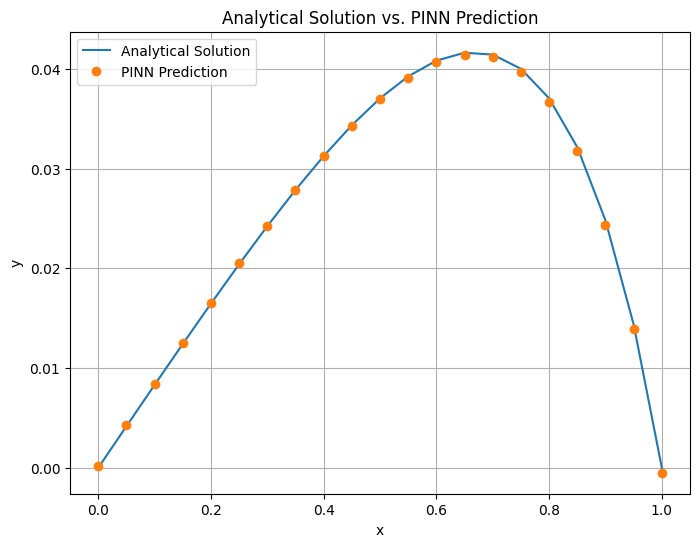

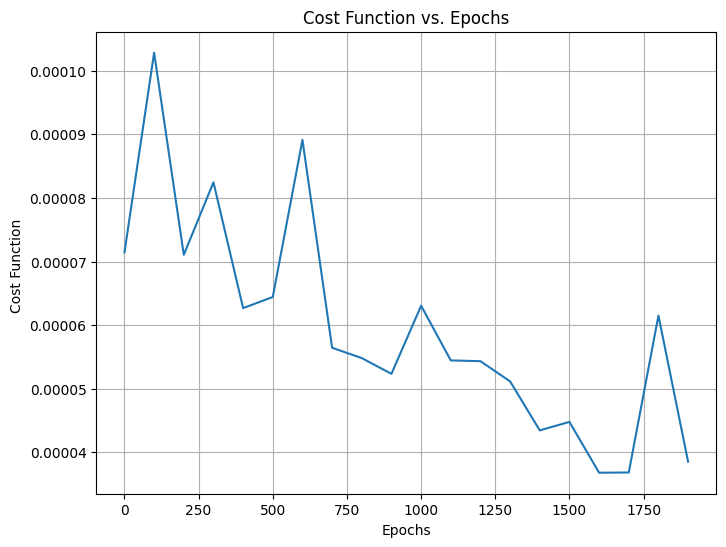

In [13]:
# Plotting
plt.figure(figsize=(8, 6))
plt.title('Analytical Solution vs. PINN Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.plot(x,P1D, label="Analytical Solution")
plt.plot(x,y,'o', label="PINN Prediction")
plt.legend()

plt.figure(figsize=(8, 6))
plt.plot(Epo[0:2000:100], cost[0:2000:100])
plt.title('Cost Function vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost Function ')
plt.grid(True)
plt.show()

### References

[1] M. Raissi, P. Perdikaris, and G. E. Karniadakis, Physics
informed deep learning (part i): Data-driven solutions of
nonlinear partial differential equations, arXiv preprint
arXiv:1711.10561 (2017) \\
[2] M. Raissi, P. Perdikaris, and G. E. Karniadakis, Physics
Informed Deep Learning (Part II): Data-driven Discovery
of Nonlinear Partial Differential Equations, arXiv preprint
arXiv:1711.10566 (2017) \\
[3] M. Raissi, P. Perdikaris, and G. E. Karniadakis, Physicsinformed neural networks: A deep learning framework for solving forward and inverse problems involving nonlinear partial
differential equations, Journal of Computational physics 378
(2019) \\